In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("car-data.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,big,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


In [7]:
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['Class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
buying=le.fit_transform(list(df["buying"]))
maint=le.fit_transform(list(df["maint"]))
doors=le.fit_transform(list(df["doors"]))
persons=le.fit_transform(list(df["persons"]))
lug_boot=le.fit_transform(list(df["lug_boot"]))
safety=le.fit_transform(list(df["safety"]))
cls=le.fit_transform(list(df["Class"]))

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
print(buying)

[3 3 3 ... 1 1 1]


In [12]:
for data in df:
    print(data)

buying
maint
doors
persons
lug_boot
safety
Class


In [13]:
X=list(zip(buying,maint,doors, persons, lug_boot, safety))
Y=list(cls)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
print("training data:",len(X_train))
print("testing data:", len(X_test))

training data: 1382
testing data: 346


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfusionMx=[];
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.83526012, 0.79768786, 0.86705202, 0.85549133, 0.89306358,
       0.91907514, 0.93063584, 0.93352601, 0.9132948 ])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

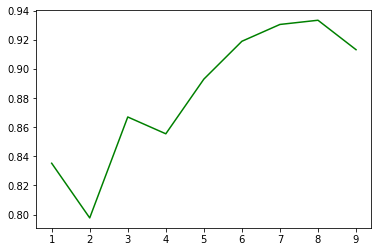

In [17]:
plt.plot(range(1,Ks), mean_acc, 'g')

In [18]:
k=8
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [19]:
yhat=neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 0, 2], dtype=int32)

In [20]:
print("training data accuracy:",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("testing data accuracy:",metrics.accuracy_score(Y_test,yhat))

training data accuracy: 0.9732272069464544
testing data accuracy: 0.9335260115606936


In [21]:
from sklearn.metrics import classification_report

print("Classification report of Random Forest Classfier :-\n")
cla_rep=classification_report(Y_test, neigh.predict(X_test))
print(cla_rep)

Classification report of Random Forest Classfier :-

              precision    recall  f1-score   support

           0       0.94      0.78      0.86        83
           1       0.91      0.91      0.91        11
           2       0.93      1.00      0.96       235
           3       0.93      0.82      0.87        17

    accuracy                           0.93       346
   macro avg       0.93      0.88      0.90       346
weighted avg       0.93      0.93      0.93       346



In [22]:
print("Predicted values are-\n",yhat[0:100])
print("------")
print("True values are-\n",Y_test[0:100])

Predicted values are-
 [2 2 2 0 2 0 2 2 2 2 3 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 0 1
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 0 2 2 0 3 2 2 0 2 2 2 2 2
 0 0 2 2 2 2 3 2 2 2 3 0 2 0 3 0 2 1 2 2 2 1 2 2 2 0]
------
True values are-
 [2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0, 3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0]


In [23]:
from joblib import dump, load 
dump(neigh, "Car-classifier.joblib")

['Car-classifier.joblib']